In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
from pymatreader import read_mat
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from iminuit import Minuit
from iminuit.cost import LeastSquares
import IPython
from pathlib import Path
from utilities import savefig, FK_fit, perform_fit, FitInput

In [2]:
NB_NAME = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"]).stem

In [3]:
DATAPATH = os.path.join(
    os.path.abspath(""), "data", "power_volt_sweep_old_dev"
)

sweep1 = os.path.join(
    DATAPATH,
    "VoltPowerScan_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241031-113614_MIRA_Pulsed_1uW_50uW_0V_-4V.mat",
)
sweep2 = os.path.join(
    DATAPATH,
    "VoltPowerScan_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241031-120027_MIRA_Pulsed_1uW_50uW_-4V_-7V.mat",
)
sweep3 = os.path.join(
    DATAPATH,
    "VoltPowerScan_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241031-125939_MIRA_Pulsed_1uW_50uW_-7V_-8p5V.mat",

)

IV = os.path.join(DATAPATH, "IV_2024_10_31_8V.mat")
PS_M6V = os.path.join(DATAPATH, "Power_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241101-141425_MIRA_Pulsed_318p2327THz_-6V1p000uW_200p000uW.mat")
PS_M7V = os.path.join(DATAPATH, "Power_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241101-135851_MIRA_Pulsed_318p2327THz_-7V1p000uW_200p000uW.mat")
PS_M8V = os.path.join(DATAPATH, "Power_APD_Source_C1_SPhw_A248r66_first_Col2__931_20241101-143528_MIRA_Pulsed_318p2327THz_-8V1p000uW_200p000uW.mat")

In [4]:
data1 = read_mat(sweep1)["Data"]
data2 = read_mat(sweep2)["Data"]
data3 = read_mat(sweep3)["Data"]
IV_data = read_mat(IV)
PS_M6V_data = read_mat(PS_M6V)["Data"]
PS_M7V_data = read_mat(PS_M7V)["Data"]
PS_M8V_data = read_mat(PS_M8V)["Data"]


IV_V = IV_data["m_vlts"]
IV_I = IV_data["m_curr"] * 1e6

PS_M6V_P = PS_M6V_data["PowerMeasured"] * 1e6
PS_M6V_I = PS_M6V_data["MeasureCurrent"] * 1e6

PS_M7V_P = PS_M7V_data["PowerMeasured"] * 1e6
PS_M7V_I = PS_M7V_data["MeasureCurrent"] * 1e6

PS_M8V_P = PS_M8V_data["PowerMeasured"] * 1e6
PS_M8V_I = PS_M8V_data["MeasureCurrent"] * 1e6

/home/ali/miniconda3/envs/university/lib/python3.11/site-packages/pymatreader/utils.py:291: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


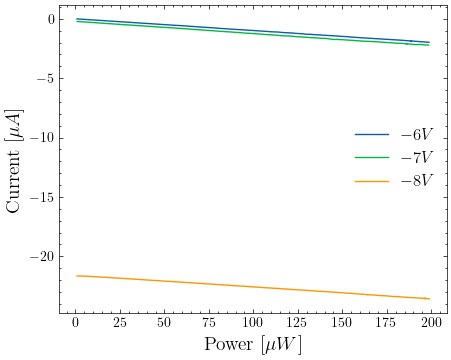

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Current [$\mu A$]", fontsize=14)
ax.plot(PS_M6V_P, PS_M6V_I, label=r"$-6V$")
ax.plot(PS_M7V_P, PS_M7V_I, label=r"$-7V$")
ax.plot(PS_M8V_P, PS_M8V_I, label=r"$-8V$")
ax.legend(frameon=False, fontsize=12)
# savefig(nb_name=NB_NAME, fig_name="P_I_realscan", fig=fig)

In [6]:
#["MeasuredPower", "MeasureCurrent", "VoltageList"]
voltages = np.concatenate((data1["VoltageList"], data2["VoltageList"][1:-1], data3["VoltageList"]),axis=0)
voltages = np.repeat(voltages.reshape(1, -1), 50, axis=0)
currents = np.hstack((data1["MeasureCurrent"], data2["MeasureCurrent"][:, 1:-1], data3["MeasureCurrent"])) * 1e6
powers = np.repeat(np.arange(1, 51), currents.shape[-1]).reshape(50, -1)
currents_err = np.abs(currents * 0.00025) + 1e-6

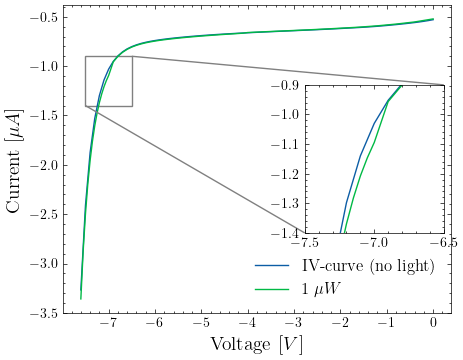

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_xlabel(r"Voltage [$V$]", fontsize=14)
ax.set_ylabel(r"Current [$\mu A$]", fontsize=14)
ax.plot(IV_V[:77], IV_I[:77], label=fr"IV-curve (no light)")
ax.plot(voltages[0][:53], currents[0][:53], label=fr"{powers[:, 0][0]} $\mu W$")

axins = zoomed_inset_axes(ax, zoom=3,loc=5)
axins.plot(IV_V[:77], IV_I[:77], label=fr"IV-curve (no light)")
axins.plot(voltages[0][:53], currents[0][:53], label=fr"{powers[:, 0][0]} $\mu W$")
axins.set_xlim(-7.5, -6.5)
axins.set_ylim(-1.4, -0.9)
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
# plt.xticks(visible=False)
# plt.yticks(visible=False)

ax.legend(frameon=False, fontsize=12)
# savefig(NB_NAME, "IV_dark", fig)

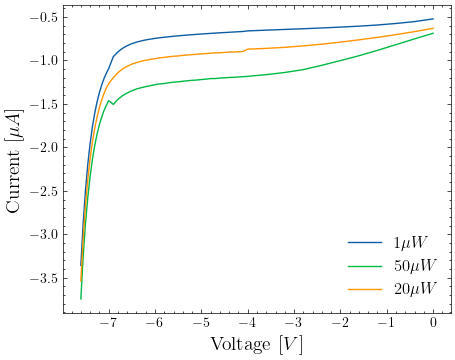

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_xlabel(r"Voltage [$V$]", fontsize=14)
ax.set_ylabel(r"Current [$\mu A$]", fontsize=14)
ax.plot(voltages[0][:53], currents[0][:53], label=fr"{powers[:, 0][0]}$\mu W$")
ax.plot(voltages[-1][:53], currents[-1][:53], label=fr"{powers[:, 0][-1]}$\mu W$")
ax.plot(voltages[19][:53], currents[19][:53], label=fr"{powers[:, 0][19]}$\mu W$")
ax.legend(frameon=False, fontsize=12)
# savefig(NB_NAME, "IV_powers", fig)

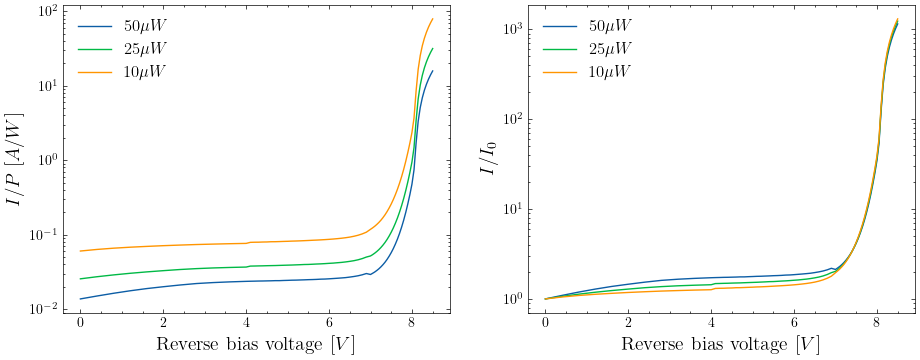

In [9]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(11, 4))
ax.set_xlabel(r"Reverse bias voltage [$V$]", fontsize=14)
ax.set_ylabel(r"$I / P$ [$A/W$]", fontsize=14)
ax.plot(-voltages[49], -currents[49] / powers[:, 0][49], label=f"{powers[:, 0][49]}$\mu W$")
ax.plot(-voltages[24], -currents[24] / powers[:, 0][24], label=f"{powers[:, 0][24]}$\mu W$")
ax.plot(-voltages[9], -currents[9] / powers[:, 0][9], label=f"{powers[:, 0][9]}$\mu W$")
ax.set_yscale("log")
ax.legend(frameon=False, fontsize=12)

ax1.set_xlabel(r"Reverse bias voltage [$V$]", fontsize=14)
ax1.set_ylabel(r"$I/I_0$", fontsize=14)
ax1.plot(-voltages[49], currents[49] / currents[49][0], label=f"{powers[:, 0][49]}$\mu W$")
ax1.plot(-voltages[24], currents[24] / currents[24][0], label=f"{powers[:, 0][24]}$\mu W$")
ax1.plot(-voltages[9], currents[9] / currents[9][0], label=f"{powers[:, 0][9]}$\mu W$")
ax1.set_yscale("log")
ax1.legend(frameon=False, fontsize=12)

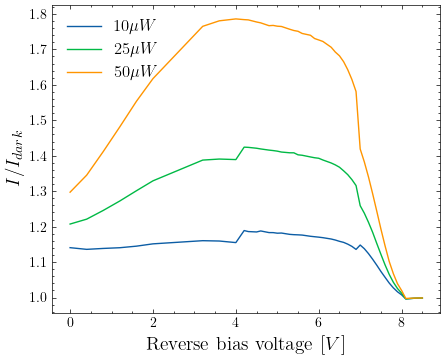

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.set_xlabel(r"Reverse bias voltage [$V$]", fontsize=14)
ax.set_ylabel(r"$I/I_{{dark}}$", fontsize=14)
for idx in [9, 24, 49]:
    ax.plot(
        -voltages[idx][np.isin(voltages[idx],IV_V)],
        currents[idx][np.isin(voltages[idx],IV_V)] / IV_I[np.isin(IV_V,voltages[idx])],
        label=f"{powers[:, 0][idx]}$\mu W$"
    )
ax.legend(frameon=False, fontsize=12)
# savefig(NB_NAME, "I_Idark_ratio_powers", fig)

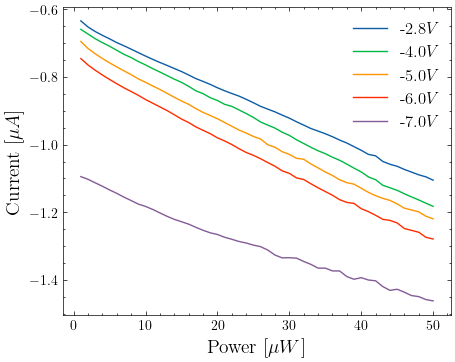

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Current [$\mu A$]", fontsize=14)
for idx in [7, 10, 20, 30, 40]:
    ax.plot(powers[:, idx], currents[:,idx], label=f"{voltages[0][idx]}$V$")
ax.legend(frameon=False, fontsize=12)
# savefig(NB_NAME, "P_I_constructed", fig)

In [12]:
I_0_vals = []
res_vals = []
I_0_errs = []
res_errs = []


for idx in range(currents.shape[1]):
    P_I_lstsq = LeastSquares(
        powers[:, idx],
        -currents[:, idx],
        currents_err[:, idx],
        model=lambda pow, I_0, res: pow * res + I_0,
    )
    P_I_minuit = Minuit(P_I_lstsq, I_0=-3, res=0.05)
    P_I_minuit.migrad()
    P_I_minuit.hesse()

    I_0_fit, res_fit = P_I_minuit.values[:]
    I_0_fit_err, res_fit_err = P_I_minuit.errors[:]

    I_0_vals.append(I_0_fit)
    res_vals.append(res_fit)

    I_0_errs.append(I_0_fit_err)
    res_errs.append(res_fit_err)

    if not P_I_minuit.accurate or not P_I_minuit.valid:
        print("NOTE: Error occured.")

I_0_vals = np.array(I_0_vals)
res_vals = np.array(res_vals)
I_0_errs = np.array(I_0_errs)
res_errs = np.array(res_errs)


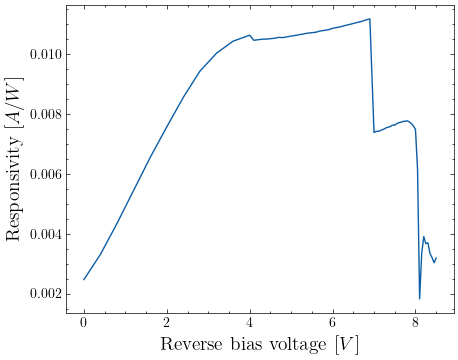

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_xlabel(r"Reverse bias voltage [$V$]", fontsize=14)
ax.set_ylabel(r"Responsivity [$A/W$]", fontsize=14)
ax.plot(-voltages[0], res_vals)
# savefig(NB_NAME, "responsivity_bias", fig)

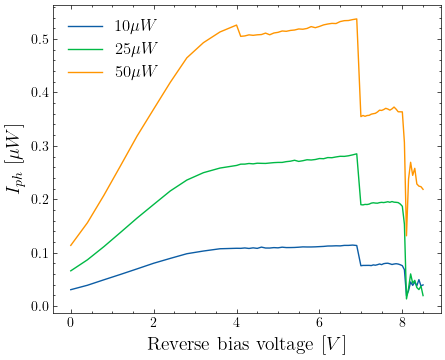

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.set_xlabel(r"Reverse bias voltage [$V$]", fontsize=14)
ax.set_ylabel(r"$I_{ph}$ [$\mu W$]", fontsize=14)
for idx in [9, 24, 49]:
    ax.plot(
        -voltages[idx],
        -(currents[idx] + I_0_vals),
        label=f"{powers[:, 0][idx]}$\mu W$"
    )
# ax.set_xlim(0,7)
# ax.set_ylim(0, 0.60)
ax.legend(frameon=False, fontsize=12)
# savefig(NB_NAME, "photocurrent_powers", fig)

In [ ]:
def responsivity_voltage_fit(V_d: np.ndarray, eta: float, g: float, alpha_0: float):
    alpha = FK_fit(931, 0, 298, V_d)
    return eta * (1 - np.exp(-3.5e-3 * (g * alpha + alpha_0)))

In [70]:
res_upper_idx = 11
res_fit_result = perform_fit(FitInput(voltages[0][:res_upper_idx], res_vals[:res_upper_idx], res_errs[:res_upper_idx], responsivity_voltage_fit, [0.01, 0.4, 50]))

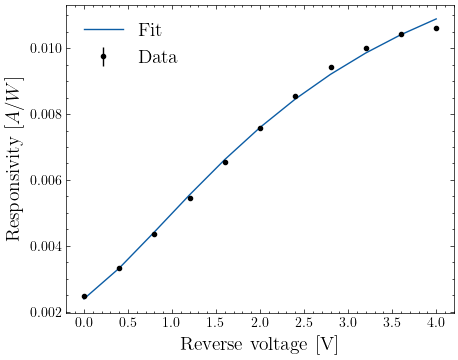

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
pars = res_fit_result.parameters
ax.errorbar(np.abs(voltages[0][:res_upper_idx]), res_vals[:res_upper_idx], res_errs[:res_upper_idx], fmt='.k', label="Data")
ax.plot(np.abs(voltages[0][:res_upper_idx]), responsivity_voltage_fit(voltages[0][:res_upper_idx], *res_fit_result.parameters), label="Fit")
ax.set_xlabel(r"Reverse voltage [V]", fontsize=14)
ax.set_ylabel(r"Responsivity [$A/W$]", fontsize=14)
ax.legend(frameon=False, fontsize=14)
# savefig(NB_NAME, "res_bias_fit", fig)
plt.show()

In [73]:
print(f"eta from responsivity fit: {pars[0]} ± {res_fit_result.parameter_errors[0]}")
print(f"Gamma from responsivity fit: {pars[1]} ± {res_fit_result.parameter_errors[1]}")
print(f"alpha_0 from responsivity fit: {pars[2]} ± {res_fit_result.parameter_errors[2]}")

eta from responsivity fit: 0.014338922559521605 ± 9.060076613082861e-06
Gamma from responsivity fit: 0.3958875575734945 ± 0.0005052863128611641
alpha_0 from responsivity fit: 33.386100538521134 ± 0.028902356062735387
